<a href="https://colab.research.google.com/github/jorge673/ADA-INFORMES-/blob/main/Informe-Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Descripcion del problema**
---
## 1.1 **Árbol recubridor mínimo (MST: Minimum Spanning Tree)**

>**Entrada**: Grafo no dirigido** $G=(V,E)$, un costo real $c_e$ para cada uno de los arcos $e\in E$.
>
>**Salida**: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

Lo que se busca resolver en este problema es tratar de viajar por todos los nodos de un grafos con el menor costo posible,

Una de las aplicaciones más destacadas del árbol mínimo recubridor se encuentra en el ámbito de las telecomunicaciones, por ejemplo, en las redes de comunicación eléctrica, telefónica, etc. Los nodos representarían puntos de consumo eléctrico, teléfonos, aeropuertos o computadoras. Las aristas podrían ser cables de alta tensión, fibra óptica, rutas aéreas

# 2. **Descripcion del algoritmo:**
---

##2.1 Codigo



In [ ]:

#codigo basado en https://www.pythonpool.com/kruskals-algorithm-python/

#usaremos una clase ya que nos facilita como podemos usar los nodos
import networkx as nx
from termcolor import colored, cprint

class Graph:

    #constructor de la clase (Iniciamos v que es la cantidad de veritices que contiene el algoritmo)
    def __init__(self,vertice,grafo,verbose=False):
        self.V = vertice
        self.graph = []
        self.G=nx.Graph()
        self.auxG=nx.Graph()
        self.verbose=verbose
        self.primerGrafo=False
        self.arcosColor=False
        for u,v,w in grafo:
          self.graph.append([u, v, w])
        
    def setGraph(self,grafo):
      aux = nx.Graph()
      for u,v,w in grafo:
        aux.add_edge(u,v,weight=w)
        
      if(self.primerGrafo==False):
        self.G=aux
        self.primerGrafo=True
        self.pos=nx.spring_layout(self.G)
      else:
        self.auxG=aux
        self.arcosColor=True

    def crearGrafo(self,nombre=""):

      labels = nx.get_edge_attributes(self.G,'weight')
      nx.draw_networkx_edge_labels(self.G,self.pos,edge_labels=labels,font_size=14)
      nx.draw(self.G,self.pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =1.0, edge_color ="black")

      if(self.arcosColor):
        nx.draw(self.auxG,self.pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =1.0, edge_color ="red")

      if(nombre!=""):
        print(nombre)
        print()
 



    #buscamos el padre de cada vertice (se va esplicar mas adelante)
    def search(self, parent, i):
        if parent[i] == i:#si el padre de i es el mismo se retorna i
            return i
        return self.search(parent, parent[i])#si no busca el padre del padre del vertice i

    #unimos dos vertices 
    def apply_union(self, parent, rank, x, y):

        #buscamos la raizes(padres) de cada nodo
        xroot = self.search(parent, x) #Nodo x
        yroot = self.search(parent, y) #Nodo y

        #le unimos dependiendo de sus rangos 

        if rank[xroot] < rank[yroot]:#si el nodo x es menor al nodo entoces el nodo x tendra como padre y
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:#se hace lo contrario si no se cumple lo anterior (el nodo y tendra como padre x)
            parent[yroot] = xroot
        else: #si son iguales entonces se toma cualquiera como padre y el rango
            parent[yroot] = xroot
            rank[xroot] += 1

    def verboseGrafo(self,vistos=list([]),index=None,color="blue"):

        i=0
        
        for u,v,w in self.graph:
          salid=chr(97+u)+"-"+str(w)+"-"+chr(97+v)
          if i<len(vistos) and [u,v,w]==vistos[i]:
            cprint(salid.center(9),"red")
          elif [u,v,w]==index:
            cprint(salid.center(9),color)
          else:
            cprint(salid.center(9),"white")
          i+=1
 
    #aqui ocuparemos kruskal
    def kruskal(self):

        #guardaremos los resultados
        result = []

        #auxiliares e para ver la cantidad de arcos que produce la solucion
        #i nos sirve para recorrer el grafo
        i, e = 0, 0 


        if(self.verbose):
          print("Leemos los arcos")
          self.verboseGrafo()


        #ordenamos el grafo segun su peso
        self.graph = sorted(self.graph, key=lambda item: item[2])
        if(self.verbose):
          print("Ordenamos los arcos")
          self.verboseGrafo()
          print("\n------------------------------------------------------------------")

        #aqui guardaremos los padres de cada nodo
        parent = []

        #rango
        rank = []

        peso=0

        #guardamos el rango
        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        # si el numero de arcos es igual al numero de vertices - 1 el algoritmo se da por finalizado 
        while e < self.V - 1:

            u, v, w = self.graph[i]#sacamos informacion del grafo

            if(self.verbose):
              salid=chr(97+u)+"-"+str(w)+"-"+chr(97+v)
              print("ESTADO DEL GRAFO",result)
              print("Verificamos "+salid+" que cumpla que no genere ciclos")
              self.verboseGrafo(result,[u,v,w])
            
            #buscamos la raiz de U y V
            x = self.search(parent, u)
            y = self.search(parent, v)

            #si son distintos significa que no generan ciclos
            if x != y:
                if(self.verbose):
                  print("El arco ["+salid+"] si cumple asi que se agrega poniendolo en rojo")
                  print("------------------------------------------------------------------")
                #aumentamos el numero de arcos
                e = e + 1
                #guardamos el resultado
                result.append([u, v, w])

                peso+=w

                #aplicamos la union 
                self.apply_union(parent, rank, x, y)
            else:
              if(self.verbose):
                  print("El arco ["+salid+"] no cumple asi que no se toma")
                  print("------------------------------------------------------------------")
            #aumentamos i
            i = i + 1
        if(self.verbose):
            salid=chr(97+u)+"-"+str(w)+"-"+chr(97+v)
            print("ESTADO DEL GRAFO",result)
            self.verboseGrafo(result,result[len(result)-1],"red")
        return peso,result
    
        
 


In [ ]:
grafo=[[0, 1, 8],[0, 2, 5],[1, 2, 9],[1, 3, 11],[2, 3, 15],[2, 4, 10],[3, 4, 7]]
g = Graph(5,grafo,False)
g.setGraph(grafo)

Grafo resultante:



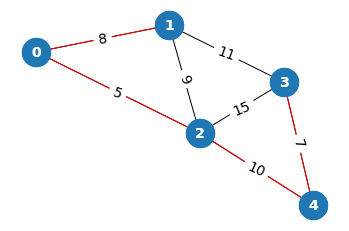

In [ ]:
peso,grafo=g.kruskal()
g.setGraph(grafo)
g.crearGrafo("Grafo resultante:")

##2.1 **Kruskal:**
---

Ela algoritmo de kruskal es muy parecido al algoritmo de prim que es constructivo y voras lo que quiere decir que construlle una solucion paso por paso basadonce en una regla heurística.

* Genera un arbol $T$

En cada paso:
* Selecion el arco con menor coste, con la condicion de que no generes ciclos
* el arco anterior se agrega a $T$

Ademas los nodos a los cuales accedemos se guardan en $X$ para guardarlos en el arbol

##2.2 **Ejemplo**:
---

para ejemplificar como funciona el algoritmo vamos a usar un grafo de 6 nodos $[A,B,D,E,F]$ y sus direcciones con sus costes $[AB,AC,BC,BD,...]$ 

Primero ordena los nodos de mayor a menor

* D-5-E
* A-5-B
* B-10-D
* C-10-D
* C-15-E
* E-15-F
* D-20-F
* B-20-C
* A-30-C

Imagen animada:

![image](https://jariasf.files.wordpress.com/2012/04/kruskals-algorithm.gif)

* Usando esta imagen podemos describir muy bien como funciona Kruskal 

* Cuando los nodos estan en azul significa que esta analisando que los arco de entre esos nodos cumpla con la condicion de que no cumpla 

* si cumple deja el arco en morado 

* si no deja el arco en asul claro como por ejemplo el arco C-15-E no cumple con los requisitos porque este produciria un ciclo con C-10-D

* al visitar cada nodo estos se quedan en morado


##Ejemplo codigo
---

Grafo base:



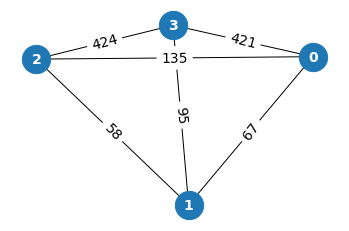

In [ ]:
import random

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph

ejemplo=graph_instance_creator(4)
g2 = Graph(4,ejemplo,True)
g2.setGraph(ejemplo)
g2.crearGrafo("Grafo base:")




Leemos los arcos
  a-67-b 
 a-135-c 
 a-421-d 
  b-58-c 
  b-95-d 
 c-424-d 
Ordenamos los arcos
  b-58-c 
  a-67-b 
  b-95-d 
 a-135-c 
 a-421-d 
 c-424-d 

------------------------------------------------------------------
ESTADO DEL GRAFO []
Verificamos b-58-c que cumpla que no genere ciclos
  b-58-c 
  a-67-b 
  b-95-d 
 a-135-c 
 a-421-d 
 c-424-d 
El arco [b-58-c] si cumple asi que se agrega poniendolo en rojo
------------------------------------------------------------------
ESTADO DEL GRAFO [[1, 2, 58]]
Verificamos a-67-b que cumpla que no genere ciclos
  b-58-c 
  a-67-b 
  b-95-d 
 a-135-c 
 a-421-d 
 c-424-d 
El arco [a-67-b] si cumple asi que se agrega poniendolo en rojo
------------------------------------------------------------------
ESTADO DEL GRAFO [[1, 2, 58], [0, 1, 67]]
Verificamos b-95-d que cumpla que no genere ciclos
  b-58-c 
  a-67-b 
  b-95-d 
 a-135-c 
 a-421-d 
 c-424-d 
El arco [b-95-d] si cumple asi que se agrega poniendolo en rojo
------------------------

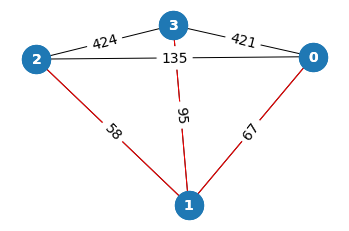

In [ ]:
peso,a=g2.kruskal()
g2.setGraph(a)
g2.crearGrafo("Grafo resultante:")

#3. **Correctitud**
---



## Teorema 1(Correctitud del algoritmo de Kruskal usando Union-Find)
El algoritmo de Kruskal se encarga de generar un árbol recubridor $T$ que contiene la mínima suma posible de arcos donde estén todos los nodos presentes con un grafo $G$ de entrada.

#### Lema 1 (propiedad de bucle invariante del algoritmo de Kruskal usando Union-Find)
>_"Al comienzo de cada iteración del bucle más grande, el grafo resultante $T$ contiene los nodos del grafo entrante, pero no formando ciclos y utilizando los arcos con menor valor."_

## **Prueba del Lema 1.**
Para probar que la propiedad es verdadera, debemos probar que:

- Es verdadera antes de la primera iteración (**inicialización**)
- Si es verdadera antes de una iteración, lo sigue siendo después de la iteración (**mantención**)
- Asumiremos que las tres operaciones del Union-Find están bien implementadas.

**Inicialización**: Notamos que el primer arco $e$ seleccionado es el que contiene el valor más bajo (porque antes de la iteración se ordenó del arco menor al arco mayor), debido a que es el primer arco seleccionado, los dos nodos que contiene ese arco se unen por la operación Unión obteniendo nuestra primera conexión para el árbol recubridor final.

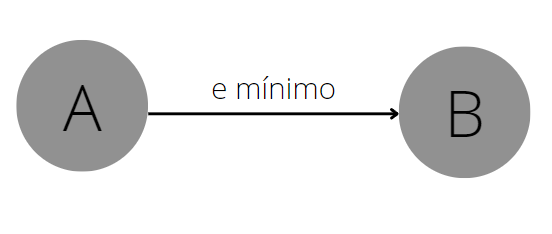

**Mantención**: Para probar la mantención, debemos observar lo que ocurre durante la i-ésima iteración. Asumimos antes de entrar a la iteracion que el arbol recubridor no contiene ningun ciclo.

Durante la iteracion se selecciona el i-ésimo arco $e_{i-ésima}$, los dos nodos que contiene este arco se le buscan sus raices con la operacion Find por lo que ocurren dos posibilidades:

+ Si find($nodo_1$) es distinto de find($nodo_2$) significa que no están en un mismo conjunto, por lo que no habrá ciclo si se unen por lo que se agrega esta estos nodos y arco $e_{i-ésima}$ al árbol recubridor y se utiliza la operación Union para unir los conjuntos de los dos nodos a una misma raíz. Después de agregar el arco y sus nodos al árbol recubridor y unirlos se sigue al siguiente arco $e_{i-ésimo + 1}$.

+ Si find($nodo_1$) es igual que find($nodo_2$) no se agregan al árbol recubridor, por lo que no se utiliza la operación Union porque al tener la misma raíz significa que unirlos provocara un ciclo, por esto este arco se descarta y se sigue al siguiente arco $e_{i-ésimo + 1}$.

El algoritmo terminará la iteración cuando haya tantos arcos como nodos - 1, significando que están todos los nodos del grafo entrante en el árbol recubridor.

Como en cada iteración empezamos desde el arco más pequeño hasta el más grande, nos podemos asegurar que los arcos con el menor coste tendrán prioridad al momento de crear este árbol recubridor, también la implementación de las operaciones de Find y Union que nos ayudan a encontrar la raíz de cualquier nodo y la otra al crear una relación entre dos nodos donde ahora tendrán una raíz en común, gracias a estas operaciones podemos evitar la creación de ciclos dentro del árbol recubridor.

Con esto podemos asegurar que el algoritmo de kruskal con Union-Find genera un árbol recubridor sin ciclos usando todos los nodos del grafo de entrada y con el menor costo posible, por lo que este algoritmo es correcto por la propiedad invariante de bucle.

# 4. **Tiempo de ejecución**
---
Para ver el tiempo de ejecución del Algoritmo de Kraskal primero veremos el tiempo de ejecución de las operaciones del Union-Find que describimos anteriormente. Si bien antes mostramos sus tiempos de ejecución, ahora justificaremos del porqué tienen ese tiempo de ejecución.

## 4.1 **Tiempo de ejecución de las operaciones Union-Find**
---
#### **Operación Inicializar**:
Como describimos anteriormente, dado un conjunto de $n$ objetos, inicializar creara una estructura de datos union-find con cada objeto del conjunto de entrada. Por lo que tenemos lo siguiente:

+ Para cada $i = 1,2,3.....,n$, inicializar crea un $U(i)$ para $i$

Por lo que la operación claramente tiene complejidad $O(n)$, debido a que recorre los $n$ objetos del conjunto de entrada.

También hay que tener en cuenta que $n$ es la cantidad de objetos, por lo que Inicializar dependerá de la cantidad de nodos u objetos del conjunto de entrada, no de las aristas o arcos.

#### **Operación Find**:
En la operación find, iremos recorreremos un conjunto union-find hasta encontrar su raíz y retornar el nodo raíz.

+ Empezando de una posición $x$ de un array, repetidamente atravesar los arcos hasta llegar a una posición $j$ con $U(j) = j$.

+ Retorna $j$

Para saber cuanto tiene que recorrer find hasta encontrar la raíz tenemos que definir la profundidad de un nodo $x$ como el número de recorridos que realiza la operación Find desde $x$.

Cuando $v$ y $w$ no están unidos a un conjunto más grande, o sea tanto $v$ como $w$ son sus propios raíces el tiempo de ejecución seria $O(1)$, este seria el mejor caso.

Entonces el tiempo de ejecución en el peor de los casos es correspondiente a la mayor profundidad de un nodo-equivalente, a la mayor altura del árbol en el grafo de entrada. Quien tiene la responsabilidad de crear ese arbol es Union ya que dependiendo de como se implemente esta operacion afectara en el tiempo de ejecucion de find.

Por ejemplo podríamos tener el siguiente caso:

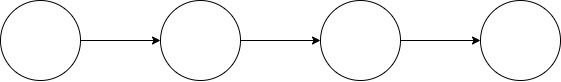

Para este caso Find tendría tiempo de ejecución $O(n)$, este se podría considerar el peor caso.

Aquí hay otro caso posible:

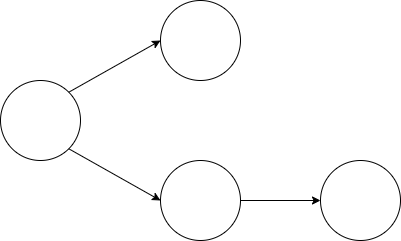

Para este caso Find tendría tiempo de ejecución $O(logn)$

Por lo que tenemos que tener en cuenta de Find es que en cuanto a tiempo de ejecución depende de Union y de la cantidad de nodos, en cuanto a union se implementa de tal manera que el tiempo de ejecución en caso promedio es el del $O(logn)$.

## **Operación Union**:
Para la operación Union tenemos dos objetos o nodos $x$ e $y$, pertenecientes a dos árboles $T_1$ y $T_2$ del grafo de entrada que los contiene, deben combinarse en un solo árbol. Hay varias maneras de combinar dos árboles por ejemplo:

##**Ejemplo 1:**

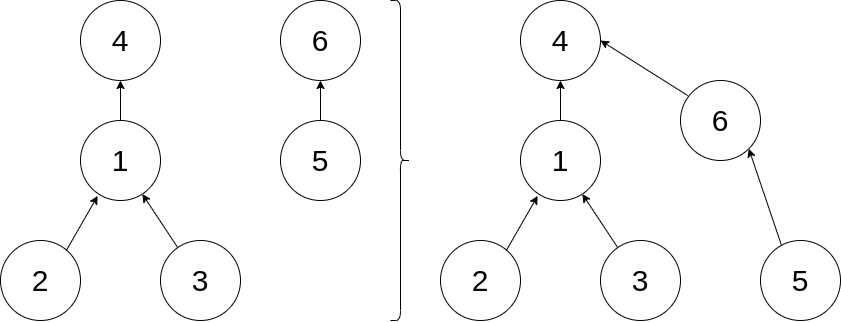

###**Ejemplo 2:**

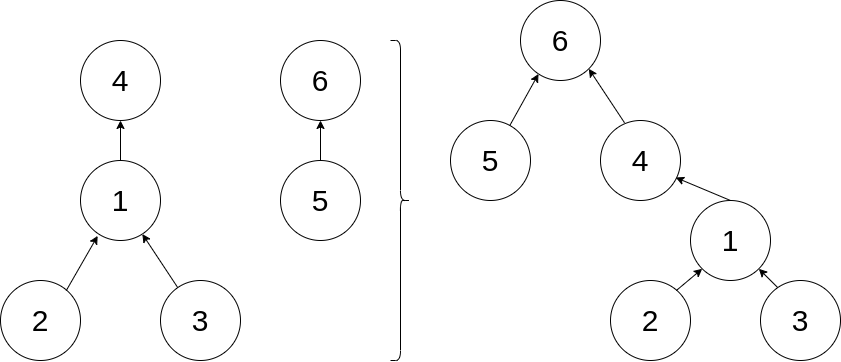

Por lo que tenemos que tomar la decisión de como unir estos dos árboles y es por eso que haremos la union por rango que siempre une el árbol con altura más baja a la raíz del árbol con altura más alta, o sea que en este caso se haría el ejemplo 2, ya que $T_1$ tiene mayor altura que $T_2$.

Para implementar la union por rango, cada nodo se asociará a un rango. Inicialmente, todos los nodos tendrán a sí mismos como árbol, por lo que su rango será cero.

Los casos para unir dos árboles será:

+ Si ambos árboles tiene el mismo rango: el rango del conjunto resultará en uno más grande, como también la raíz puede ser cualquiera de los dos, ya que tienen el mismo rango.

+ Si ambos arboles tienen rangos distintos:

>+ Si la altura de $T_1 > T_2$ entonces quien sera la raiz de esta union sera $T_1$.

>+ Si la altura de $T_1 < T_2$ entonces quien sera la raiz de esta union sera $T_2$

Para hacer estas comparaciones se tendrá que llamar la función Find para los dos árboles y así obtener su altura, esto tiene como tiempo de ejecución $O(logn)$.

Como podemos ver, esta operación utiliza Find dentro de sí misma y por eso depende de Find su tiempo de ejecución al igual que Find dependía de como Union une los árboles repercutía en su tiempo de ejecución, por lo que quien hace la diferencia para que Find y Union tengan un tiempo de ejecución u otra y ese es el criterio de como unimos los árboles en este caso lo hacemos por rango y ese es el que marca la diferencia.

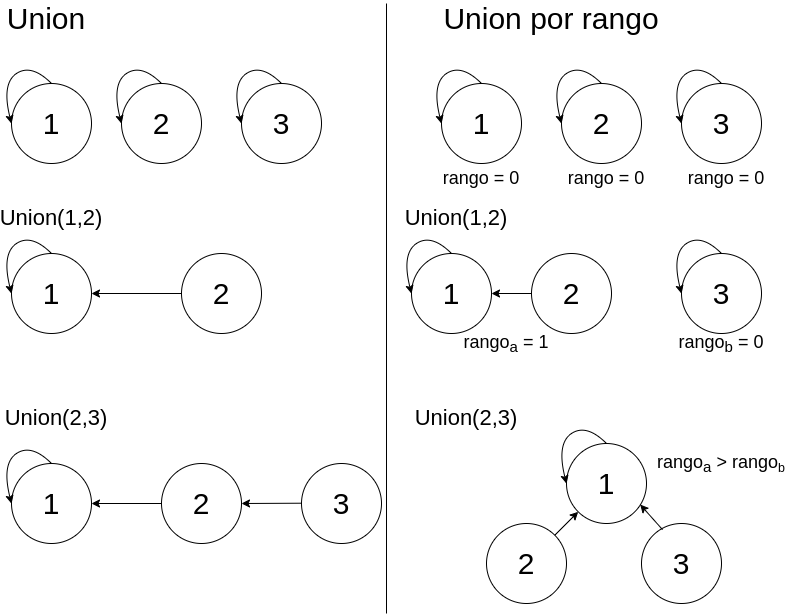

## 4.2. **Tiempo de ejecución del algoritmo de Kruskal con Union-Find**
---
Ahora que sabemos el tiempo de ejecución de las operaciones Union-Find y el porqué procederemos a ver el tiempo de ejecución del algoritmo de Kruskal usando el conjunto de datos Union-Find.

Por lo que volveremos al pseudocódigo de la parte 2

```
Función kruskalUnionFind (Grafo):
      
      T = ∅ 
      U = initialize(V)

      // Ordena los arcos de los nodos por coste usando un algoritmo de      
      // ordenamiento ej : MergeSort

      Para cada (v , w) ∈ E en orden creciente del coste:
          Si Find(U,v) != Find(U,w) entonces:
              T = T ∪ {(v,w)}
              Union(U, v, w)

      retorna T        
```
Tomando lo siguiente: $n$ los nodos y $m$ los arcos.

Vamos por partes:

+ Antes del loop tenemos lo siguiente:
>+ La función Initialize que ya vimos que es $O(n)$
>+ Ordenar los arcos tenemos que utilizar un algoritmo de ordenamiento como MergeSort u QuickSort tiene como complejidad $O(mlogn)$ esto es debido a que ordenaremos todos los arcos $m$ en una altura $n$ de nodos.

+ Dentro del loop hay $m$ iteraciones por lo que esto es $O(m)$:
>+ $2m$ veces Find tiene como complejidad $O(mlogn)$ esto es porque Find tiene complejidad $O(logn)$, pero esto se multiplica por la cantidad de iteraciones que son $2m$.
>+ ($n-1$) veces Union: Se tiene que hacer el arbol considerando los ($n-1$) nodos restantes y eso multiplicado con la complejidad de Union nos da la complejidad $O(nlogn)$.

Sumaremos todas las complejidades:

$$Complejidad = n + m + mlogn + mlogn + nlogn$$
$$Complejidad = n + m + 2mlogn + nlogn$$
$$Complejidad = n + m + logn(2m+n)$$

La parte de $logn(2m+n)$ es la función predominante, por lo que quitando el $2$ por ser constante tenemos la complejidad del algoritmo de Kruskal que es $O((m+n)logn)$.

Con $m$ los arcos del grafo de entrada y $n$ los nodos del grafo de entrada.

## 4.3 **Memoria adicional usada en la implementación en python**
---
En la implementacion ocupo dos arreglos adicionalesm, la primera guardaba la raices de cada nodo y la otra tenia el rango de cada nodo, esto con el objetivo de facilitar la implementacion de las operaciones Union y Find.

Ambos arreglo dependen de la cantiadd de nodos por lo que si tenemos $n$ como cantidad de nodos, la memoria adicional usada por estos dos arreglos es:

+ parents[  ] tendra $O(n)$

+ rango[  ] tendra $O(n)$

#5. **Experimentacion**
---

##5.1 **Tiempo de ejecucion de Kruskal**

Vamos a analisar si el tiempo de ejecucion es correcto y ver si este cambia en algun aspecto


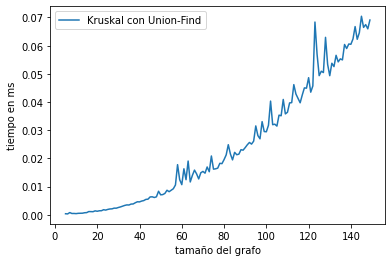

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def kruskalCall(n, grafo):
  g = Graph(n,grafo)
  peso,aux=g.kruskal()
  return peso,aux

x=[]; y=[]

for n in range(5,150):

  grafo = graph_instance_creator(n)
  
  t = repeat(setup="from __main__ import kruskalCall", stmt=f"kruskalCall({n},{grafo})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Kruskal con Union-Find"])

plt.xlabel('tamaño del grafo')
plt.ylabel('tiempo en ms')
plt.show()


* Podemos ver que el alogritmo no es 100% lineal pero se asemeja bastante a un tiempo lineal lo hace exelente para encontrar soluciones rapidas

* Las cotas casi no varian durante las primeras 60 soluciones aun asi la diferencia no es mucha

* Aqui podemos confirmar que el tiempo de ejecucion de Kruskal es de $O(n)$

##5.1 **kruskal vs prim**

Vamos a comparar 2 algoritmos que resuelven los mismos problemas, anterior mente habiamos dicho que eran mus parcecidos porque eran constructivo y voraz pero,¿tienen la misma complejidad temporal?,¿cual es mas rapido? y ¿y porque?

In [ ]:
from collections import defaultdict

class Edge:
    def __init__(self, val=None, a_vertex=None, b_vertex=None):
        self.weight = val
        self.a = a_vertex
        self.b = b_vertex

class EdgeMinHeap:
    def __init__(self):
        self.heap = []

    def heapify(self, index):
        minimum = index
        left = 2 * index + 1 # left(node) index
        right = 2 * index + 2 # right(node) index
        # value at left is minimum ?
        if left < len(self.heap) and self.heap[left].weight < self.heap[index].weight:
            minimum = left
        if right < len(self.heap) and self.heap[right].weight < self.heap[minimum].weight:
            minimum = right
        if minimum != index:
            self.interchange_vertex(index, minimum)

    def insert(self, edge):
        if len(self.heap) == 0:
            self.heap.append(edge)
        else:
            self.heap.append(edge)
            for i in range((len(self.heap)//2)-1, -1, -1):
                self.heapify(i)

    def delete(self):
        self.interchange_vertex(0, len(self.heap)-1) # Exchange 0th index with last index
        min_edge = self.heap.pop() # pop last element
        for i in range((len(self.heap)//2)-1, -1, -1):
            self.heapify(i)
        return min_edge

    def interchange_vertex(self, index_a, index_b):
        temp_val = self.heap[index_a].weight
        temp_a = self.heap[index_a].a
        temp_b = self.heap[index_a].b
        self.heap[index_a].weight = self.heap[index_b].weight
        self.heap[index_a].a = self.heap[index_b].a
        self.heap[index_a].b = self.heap[index_b].b
        self.heap[index_b].weight = temp_val
        self.heap[index_b].a = temp_a
        self.heap[index_b].b = temp_b


class Graphprim:
    def __init__(self, v_count):
        self.V = v_count
        self.graph = defaultdict(list)
        self.min_heap = EdgeMinHeap()

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))

    def prims_mst_util(self, visited):
        min_edge = Edge()
        min_edge.weight = float('inf')
        for u in self.graph:
            for v, weight in self.graph[u]:
                if weight < min_edge.weight:
                    min_edge.weight = weight
                    min_edge.a = u
                    min_edge.b = v
        self.min_heap.insert(min_edge)
        edge_count = 0
        cost = 0
        while edge_count < self.V-1:
            new_edge = self.min_heap.delete() # get a min edge(which is connected and unvisited)
            cost += new_edge.weight # add its cost to overall cost
            edge_count += 1 # increase up the edge_count
            for u in [new_edge.a, new_edge.b]: # Iterate over the both ends of new_edge
                #if visited[u] == False or u == new_edge.a or u == new_edge.b:
                for v, weight in self.graph[u]: # Iterate over the adjacents for each end of new_edge
                    if visited[u] == False and visited[v] == False and v != new_edge.a and v != new_edge.b : # if adjacent edge is new/not_current_edge
                        self.min_heap.insert(Edge(weight, u, v)) # push it to heap
                        #visited[v] = True # Mark the adjacent visited to make it unavailable for other edges
            visited[new_edge.a] = True # mark first end of new_edge as visited
            visited[new_edge.b] = True # mark second end of new_edge as visited
        return cost

    def mst_cost(self):
        visited = [False]*self.V
        cost = self.prims_mst_util(visited)
        return cost

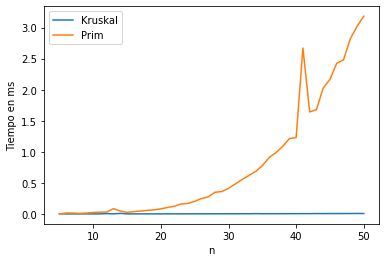

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random


def primsCall(n, grafo):
    g = Graphprim(n)
    for i in grafo:
        g.add_edge(i[0],i[1],i[2])

    cost=g.mst_cost()    
    return cost

x=[]
y_Kruskal = []
y_Prim = []

for n in range(5,51):
  grafo = graph_instance_creator(n)

  t_Kruskal = repeat(setup="from __main__ import kruskalCall", stmt=f"kruskalCall({n},{grafo})", repeat=1, number=10)
  t_Prim = repeat(setup="from __main__ import primsCall", stmt=f"primsCall({n},{grafo})", repeat=1, number=10)

  x.append(n)
  y_Kruskal.append(t_Kruskal)
  y_Prim.append(t_Prim)


plt.plot(x,y_Kruskal)
plt.plot(x,y_Prim)

plt.legend(["Kruskal", "Prim"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

* la diferencia de tiempos de los 2 algoritmos se puede apreciar a simple vista a pesar de que ambos sean voraces

* Kruskal es mucho mas rapido que Prim dejando ver mejor que la complejidad de Kruskal es $O(n)$ y Prim $O(n^2)$

* Puede que Prim sea mas lento porque revisa cada vertice y sus caminos lo cual mientras mas sean estos mas tiempo se va demorar

##5.1 **kruskal vs prim 2:resultado optimo**

por ultimo viendo lo anterior revisaremos cual da la solucion mas optima viendolo por su peso



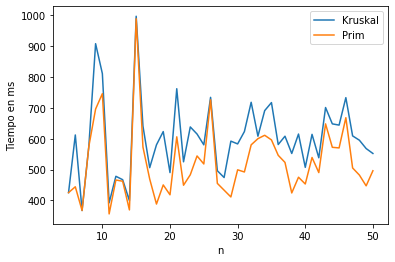

In [ ]:
x=[]
y_Kruskal = []
y_Prim = []

for n in range(5,51):
  grafo = graph_instance_creator(n)

  p_Kruskal = kruskalCall(n,grafo)
  p_Prim = primsCall(n,grafo)

  x.append(n)
  y_Kruskal.append(p_Kruskal[0])
  y_Prim.append(p_Prim)


plt.plot(x,y_Kruskal)
plt.plot(x,y_Prim)

plt.legend(["Kruskal", "Prim"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

* el algoritmo de kruskal casi siempre da un resultado mas optimo que el de Kruskal
* la diferencia de estos puede variar segun los casos pero tendria que probarse con otro generador de intancias que tenga de arcos mas variados

Con los ultimos 2 experimentos podimos ver los pro y los contra de kruskal y prim, dejando en claro que lo mas importantes de un algoritmo no es el tiempo de ejecucion. Para este caso se equilibran ambos algoritmo dejandolos a la par, Kruskal es rapido pero no da siempre el mejor resultado y prim es lento pero da soluciones optimas